In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
import seaborn as sns
import re
import json
import requests
import subprocess
import glob
import os
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Read in Logistic Regression dataset output from 'MONTGOMERY COUNTY MD COUNTING OUR TOWS 2of2" in GitHub
lr_df = pd.read_csv("lr_df.csv")

In [ ]:
lr_df

,hh_income,black_rate,redzone
0,208929,0.020197,0
1,135208,0.012500,0
2,218173,0.189774,0
3,172778,0.110861,0
4,172778,0.110861,0
...,...,...,...
505,231250,0.013878,0
506,111500,0.198634,0
507,62000,0.135650,0
508,70132,0.176030,0


In [ ]:
#REPEAT: TO BALANCE DATA, USE SMOTE WHICH WAS CONFLICTING OUT IN ANACONDA
#Set features X and target y datasets
X = lr_df.iloc[:,0:-1] 
y = lr_df["redzone"]


In [ ]:
#Break data into train and test using 10%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
# view our existing split fr sets 80:20 ratio

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (408, 2)
Number transactions y_train dataset:  (408,)
Number transactions X_test dataset:  (102, 2)
Number transactions y_test dataset:  (102,)


In [ ]:
#Use SMOTE for balancing
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 40
Before OverSampling, counts of label '0': 368 



In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (736, 2)
After OverSampling, the shape of train_y: (736,) 

After OverSampling, counts of label '1': 368
After OverSampling, counts of label '0': 368


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

LogReg.fit(X_train_res,y_train_res)


y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0 1]
Intercept [-0.17297931]
Coefficients [[-1.5634457   0.42313239]]


In [ ]:
print(classification_report(y_test, LogReg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.76      0.86        89
           1       0.36      0.92      0.52        13

    accuracy                           0.78       102
   macro avg       0.67      0.84      0.69       102
weighted avg       0.91      0.78      0.82       102



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[68, 21],
       [ 1, 12]])

Text(0.5, 257.44, 'Predicted label')

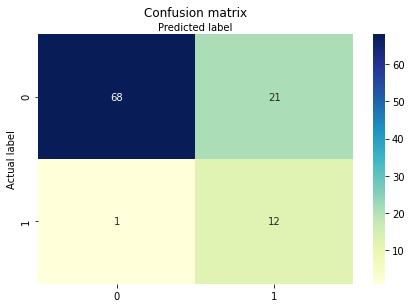

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
12/(12+1) #recall calc: very good at predicting true negatives = at_risk propertries in MC

Accuracy: 0.7843137254901961
Precision: 0.36363636363636365
Recall: 0.9230769230769231


0.6854838709677419

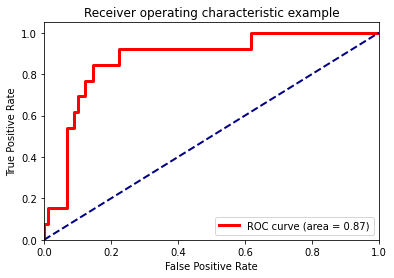

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
#0.61 ROC value indicates the model is not good enough at predicting True positive;  since recall is better, we could choose this
#model to find the extreme outliers